In [161]:
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
from bokeh.plotting import figure as bokeh_figure
from bokeh.plotting import show as bokeh_show
from bokeh.io import output_file as bokeh_output_file

# This tells Jupyter not to autoreload code changes on the notebook from disk
%load_ext autoreload
%autoreload 0

# this tells Jupyter to plot inline
%matplotlib inline

# this sets the default size for plots in inches
plt.rcParams["figure.figsize"] = (7, 7)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
## CHART 1 (Matplotlib): AMZN OPEN AND CLOSE DAILY PRICE LINES

In [163]:
# first, load data from CSV
amzn_csv = pathlib.Path('../datasets/amzn.csv').absolute()
amzn = pd.read_csv(str(amzn_csv), index_col=0, parse_dates=True)

<Figure size 504x504 with 0 Axes>

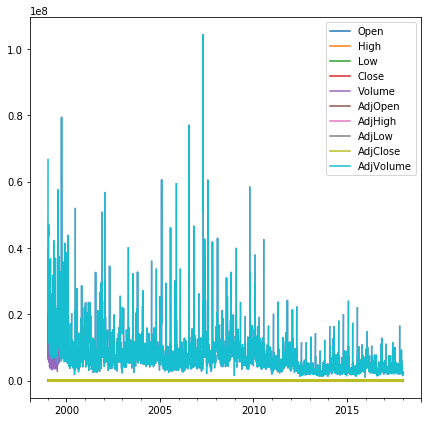

In [164]:
# print the whole dataframe using pandas
fig_1 = plt.figure()
plot_1 = amzn.plot()
plot_1

<Figure size 504x504 with 0 Axes>

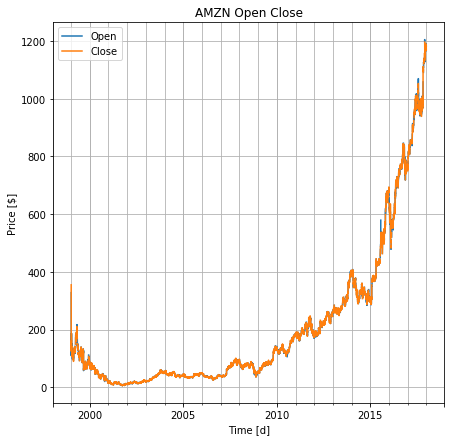

In [165]:
# Last plot is mixing together different columns of the DF, with different Y-axis
# values (volumes, prices). Morevoer, graphically it looks nasty. Let's improve it!

# only plot 'Open' and 'Close' columns
amzn_openclose = pd.DataFrame(amzn, columns=['Open', 'Close'])

fig_2 = plt.figure()

# plot with a title, a grid
plot_2 = amzn_openclose.plot(grid=True, title='AMZN Open Close')

# set axis labels and legend
plt.xlabel('Time [d]')
plt.ylabel('Price [$]')
plt.legend(loc='best')

# Add gridlines for minor X-axis tickers
plot_2.xaxis.grid(True, which='minor')

plot_2

In [166]:
# let's now zoom on a subset of days, so we can appreciate the price differences
BOX_START = '2015-03-01'
BOX_MID = '2015-03-08'
BOX_END = '2015-03-30'

In [ ]:
# slice the dataframe
amzn_boxed_openclose = amzn_openclose[BOX_START:BOX_END]

In [ ]:
# plot it
fig_3 = plt.figure()
plot_3 = amzn_boxed_openclose.plot(grid=True, title='AMZN boxed Open Close',  marker='o') 
plt.xlabel('Time [d]')
plt.ylabel('Price [$]')
plt.legend(loc='best')
plot_3.xaxis.grid(True, which='minor')
plot_3

In [ ]:
# ---------------------------------------------------------------------------------

In [ ]:
## CHART 2 (Matplotlib): DAILY CLOSE PRICES HISTOGRAMS AND AVERAGE DAILY CLOSE LINE

In [11]:
# load data from CSV
closes_csv = pathlib.Path('../datasets/daily_closes.csv').absolute()
closes = pd.read_csv(str(closes_csv), index_col=0, parse_dates=True)

In [ ]:
# slice the dataframe and only keep some columns
boxed_closes = pd.DataFrame(closes[BOX_START:BOX_MID], columns=['msft','amzn','googl','fb'])
avg_closes = pd.DataFrame(closes[BOX_START:BOX_MID], columns=['avg'])

In [1]:
# plot the close bar charts
fig_4 = plt.figure()
plot_4 = boxed_closes.plot.bar(grid=True, title='Overall boxed Close with average')
plt.xlabel('Time [d]')
plt.xticks(rotation=70)
plt.ylabel('Price [$]')
plt.legend(loc='best')
plot_4.xaxis.grid(True, which='minor')
plot_4.set_xticklabels(boxed_closes.index.format())

# add the average close price line
plot_5 = plot_4.plot(plot_4.get_xticks(), avg_closes.avg, 
                     marker='o', markeredgewidth=5, linestyle='--')

In [ ]:
# ---------------------------------------------------------------------------------

In [ ]:
## CHART 3 (Matplotlib): HISTOGRAMS SHOWING RESAMPLED MONTHLY PRICE
## IN GREEN IF THE PRICE IS ABOVE THE MONTHLY AVG, RED OTHERWISE.
## ALSO SHOW AVG PRICE LINE.

In [2]:
# define time box
MONTHLY_BOX_START = '2015-03-01'
MONTHLY_BOX_END = '2015-09-01'

In [ ]:
# load data from CSV
monthly_closes_csv = pathlib.Path('../datasets/monthly_closes.csv').absolute()
temp_df = pd.read_csv(monthly_closes_csv, index_col=0, parse_dates=True)[MONTHLY_BOX_START:MONTHLY_BOX_END]
monthly_closes = pd.DataFrame(temp_df, columns=['msft','amzn','googl','fb',
                                                'msft_above_monthly_avg',
                                                'amzn_above_monthly_avg',
                                                'googl_above_monthly_avg',
                                                'fb_above_monthly_avg'])
avg_monthly_close = pd.DataFrame(temp_df, columns=['avg'])

In [ ]:
# plot the monthly close bar charts, colorized based on their position relative to avg
binary_colors = list()  # bar colors
bar_labels = list()  # bar labels
for index, row in monthly_closes.iterrows():
    msft = 'g' if row['msft_above_monthly_avg'] else 'r'
    amzn= 'g' if row['amzn_above_monthly_avg'] else 'r'
    googl = 'g' if row['googl_above_monthly_avg'] else 'r'
    fb = 'g' if row['fb_above_monthly_avg'] else 'r'
    binary_colors.extend([msft, amzn, googl, fb])
    bar_labels.extend(['msft', 'amzn', 'googl', 'fb'])

# create plot
fig_5 = plt.figure()
plot_5 = monthly_closes.plot.bar(
    grid=True,
    title='Overall Monthly Close with average',
    color=binary_colors,
    legend=None)

# annotate bars with stock names
for i, p in enumerate(plot_5.patches):
    plot_5.annotate(bar_labels[i].upper(),
                    (p.get_x() + p.get_width() / 2., p.get_height() + 15.),
                    ha='center',
                    va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    rotation=90)

# configure plot
plt.xlabel('Time [m]')
plt.xticks(rotation=70)
plt.ylabel('Price [$]')
plot_5.set_xticklabels(monthly_closes.index.format())

# add the average monthly close price line
plot_6 = plot_5.plot(plot_5.get_xticks(), avg_monthly_close.avg, 
                     marker='o', markeredgewidth=5, linestyle='--')

In [ ]:
# ---------------------------------------------------------------------------------

In [ ]:
## CHART 4 (Bokeh): IRIS SEPALS MORPHOLOGY SCATTERPLOT

In [ ]:
# load data from CSV
iris_csv = pathlib.Path('../datasets/iris.csv').absolute()
iris = pd.read_csv(str(iris_csv))

In [ ]:
# when the plot will be created, save it to a file
bokeh_output_file('iris.html')

In [ ]:
class_colors = {
    'Iris-setosa': 'plum',
    'Iris-versicolor': 'orange',
    'Iris-virginica': 'dimgray'
}

class_line_colors = {
    'Iris-setosa': 'indigo',
    'Iris-versicolor': 'darkorange',
    'Iris-virginica': 'black'
}

colors = [class_colors.get(c, 'red') for c in iris['class']]
line_colors = [class_line_colors.get(c, 'red') for c in iris['class']]

fig_6 = bokeh_figure(title = "Iris Sepals Morphology Scatterplot")
fig_6.xaxis.axis_label = 'Sepal Length [cm]'
fig_6.yaxis.axis_label = 'Sepal Width [cm]'
fig_6.circle(iris['sepal_length_cm'], iris['sepal_width_cm'],
             color=colors, line_color=line_colors, line_width=3,
             fill_alpha=0.6, size=10)
bokeh_show(fig_6, browser='firefox')